<a href="https://colab.research.google.com/github/jpbasco/challengeTelecomX_Parte2/blob/main/challengeTelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd

In [228]:
url = 'https://raw.githubusercontent.com/jpbasco/challengeTelecomX_Parte2/refs/heads/main/datos_limpios.csv'

In [229]:
datos = pd.read_csv(url)
#datos.head()

In [230]:
datos = datos.drop(['customerID', 'gender', 'Partner', 'Dependents'],axis=1)

In [231]:
datos = datos.drop('PaperlessBilling', axis=1)

In [232]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   tenure            7267 non-null   int64  
 3   PhoneService      7267 non-null   object 
 4   MultipleLines     7267 non-null   object 
 5   InternetService   7267 non-null   object 
 6   OnlineSecurity    7267 non-null   object 
 7   OnlineBackup      7267 non-null   object 
 8   DeviceProtection  7267 non-null   object 
 9   TechSupport       7267 non-null   object 
 10  StreamingTV       7267 non-null   object 
 11  StreamingMovies   7267 non-null   object 
 12  Contract          7267 non-null   object 
 13  PaymentMethod     7267 non-null   object 
 14  Charges.Monthly   7267 non-null   float64
 15  Charges.Total     7267 non-null   float64
 16  Cuentas_Diarias   7267 non-null   float64


In [233]:
datos.head()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,0,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check,65.6,593.30,2.186667
1,No,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.40,1.996667
2,Yes,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,73.9,280.85,2.463333
3,Yes,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,Yes,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.40,2.796667


In [234]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

In [235]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [236]:
columnas = one_hot.get_feature_names_out(datos.drop('Churn', axis=1).columns)

In [237]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [238]:
X = one_hot.fit_transform(X)

In [239]:
one_hot.get_feature_names_out()

array(['onehotencoder__SeniorCitizen_1',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder_

In [240]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out())

,onehotencoder__SeniorCitizen_1,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.186667
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,1.996667
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.266667
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.838333
7263,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.836667
7264,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.676667
7265,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.261667


In [241]:
from sklearn.preprocessing import LabelEncoder

In [242]:
label_encoder = LabelEncoder()

In [243]:
y = label_encoder.fit_transform(y)

In [244]:
y

array([0, 0, 2, ..., 0, 0, 0])

In [245]:
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
Sin informacion,0.030824


In [246]:
datos = datos[datos["Churn"] != "Sin informacion"]


In [247]:
datos = datos.dropna(subset=["Churn"])
datos["Churn"] = datos["Churn"].map({"Yes": 1, "No": 0}).astype(int)


In [248]:
datos.corr(method='pearson', numeric_only=True)

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
Churn,1.000000,0.150889,-0.352229,0.193356,-0.198324,0.193356
SeniorCitizen,0.150889,1.000000,0.016567,0.220173,0.103006,0.220173
tenure,-0.352229,0.016567,1.000000,0.247900,0.826178,0.247900
Charges.Monthly,0.193356,0.220173,0.247900,1.000000,0.651174,1.000000
Charges.Total,-0.198324,0.103006,0.826178,0.651174,1.000000,0.651174
Cuentas_Diarias,0.193356,0.220173,0.247900,1.000000,0.651174,1.000000


In [249]:
datos[["tenure", "Charges.Total", "Churn"]].corr()

,tenure,Charges.Total,Churn
tenure,1.000000,0.826178,-0.352229
Charges.Total,0.826178,1.000000,-0.198324
Churn,-0.352229,-0.198324,1.000000


In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

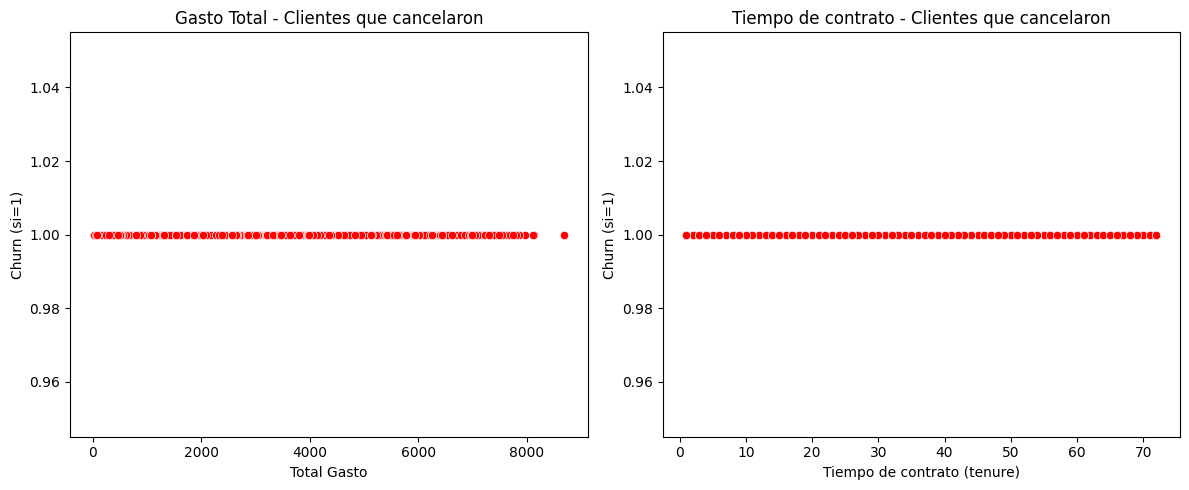

In [258]:
datos_churn = datos[datos["Churn"] == 1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Charges.Total", y="Churn", data=datos_churn, color="red")
plt.title("Gasto Total - Clientes que cancelaron")
plt.xlabel("Total Gasto")
plt.ylabel("Churn (si=1)")

plt.subplot(1, 2, 2)
sns.scatterplot(x="tenure", y="Churn", data=datos_churn, color="red")
plt.title("Tiempo de contrato - Clientes que cancelaron")
plt.xlabel("Tiempo de contrato (tenure)")
plt.ylabel("Churn (si=1)")

plt.tight_layout()
plt.show()